In [17]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

Populating the interactive namespace from numpy and matplotlib


In [68]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[1])
sns.set_style(styles[0])
rnanames = np.array(['miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'snoRNA', 'srpRNA', 'tRNA',
       'lncRNA', 'mRNA', 'tucp', 'hg38other', 'nonHuman_N'])
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.

待做
- [] 确定表格输入row和columns
- [] ranges

In [3]:
file1 = '/BioII/lulab_b/caojingyi/project/sr2017/stat/type_summary.per'
file2 = '/BioII/lulab_b/caojingyi/project/sr2017/stat/crc_len_summary.final.per'

In [4]:
rna_ratio = pd.read_table(file1)
rna_ratio.head()

,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA,tucp,hg38other,nonHuman_N
Sample_1S1,0.230273,0.331604,0.016360,0.007073,0.000298,0.000806,0.035032,0.003882,0.007302,0.012638,0.233108,0.121623
Sample_1S10,0.267002,0.320761,0.010116,0.003316,0.000203,0.000536,0.037869,0.003044,0.005817,0.009621,0.166514,0.175200
Sample_1S11,0.250690,0.306307,0.011824,0.004003,0.000225,0.000612,0.034920,0.003556,0.006975,0.011333,0.189603,0.179952
Sample_1S12,0.265619,0.300422,0.013549,0.005439,0.000352,0.000842,0.044244,0.003327,0.008459,0.012719,0.244968,0.100062
Sample_1S13,0.241204,0.428304,0.009041,0.004130,0.000262,0.000501,0.047176,0.002561,0.004107,0.009265,0.148161,0.105289


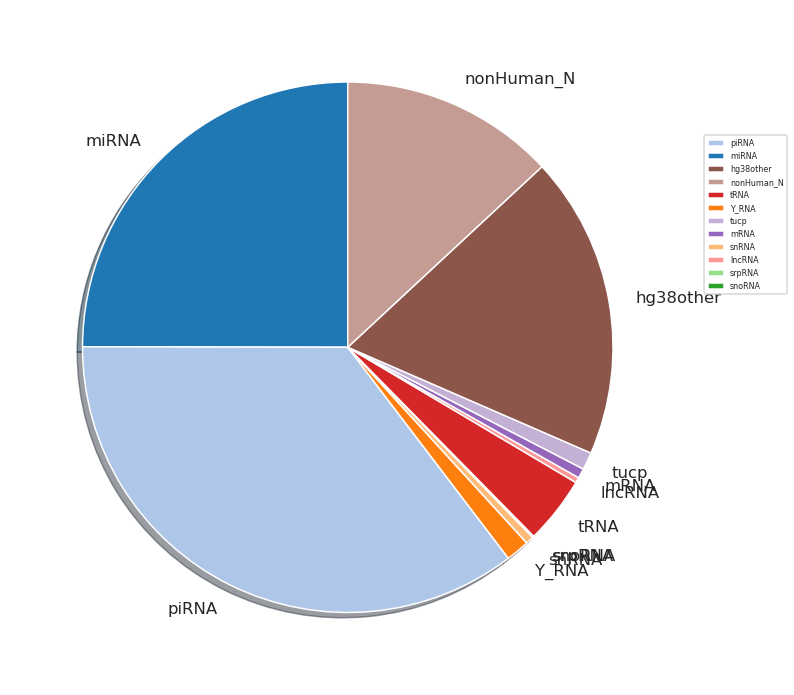

In [6]:
x = rnanames
colours = tableau20[:len(x)]/255.
y = rna_ratio.mean()
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
labels = rnanames
labels_ = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]
patches, texts = ax1.pie(y,  colors=colours, labels = labels,#autopct='%1.1f%%',
                        shadow=True, startangle=90)



sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)
plt.tight_layout()

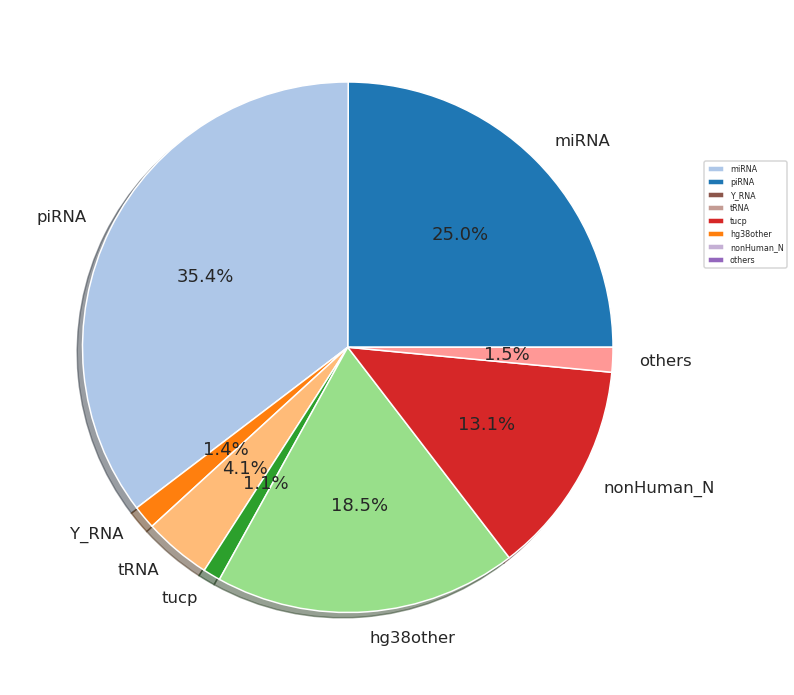

In [75]:
no_adjustment = False
plt.figure(1, figsize=(10,10))
x = np.array(rnanames)
y = np.array(rna_ratio.loc[:,x].mean())
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100
labels = rnanames

fig1, ax1 = plt.subplots(figsize=(10,10))

#cmap = plt.get_cmap('Spectral')
#colors = [cmap(i) for i in np.linspace(0, 1, len(rnanames))]
colours = tableau20[:len(rnanames)]

if no_adjustment:
    plt.pie(y, labels=labels, autopct='%1.1f%%', shadow=True, colors=colours,labeldistance=1.05)
else:
    smallind = np.where(y <=0.01)[0]
    smallsum = np.sum(y[smallind])
    labels_ = np.concatenate((np.delete(labels,smallind),np.array(['others'])))
    y_ = np.concatenate((np.delete(y,smallind), np.array([smallsum])))
    plt.pie(y_, labels=labels_, autopct='%1.1f%%', shadow=True, colors=colours)
plt.legend(patches, labels_, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)
plt.tight_layout()

In [8]:
lengthdata = pd.read_table(file2)
lengthdata.head()

,miRNA,piRNA,Y_RNA,srpRNA,snRNA,snoRNA,tRNA,lncRNA,mRNA
16,0.005497,0.006112,0.008437,0.051114,0.061868,0.042397,0.037157,0.163992,0.191897
17,0.003704,0.004776,0.008711,0.051346,0.078669,0.055470,0.023535,0.050170,0.077533
18,0.009105,0.013321,0.020494,0.063477,0.398990,0.084507,0.026284,0.156801,0.373581
19,0.046643,0.006902,0.021579,0.062132,0.054225,0.094942,0.033714,0.073325,0.141487
20,0.126306,0.007135,0.031330,0.156042,0.059134,0.166345,0.034211,0.075163,0.057111


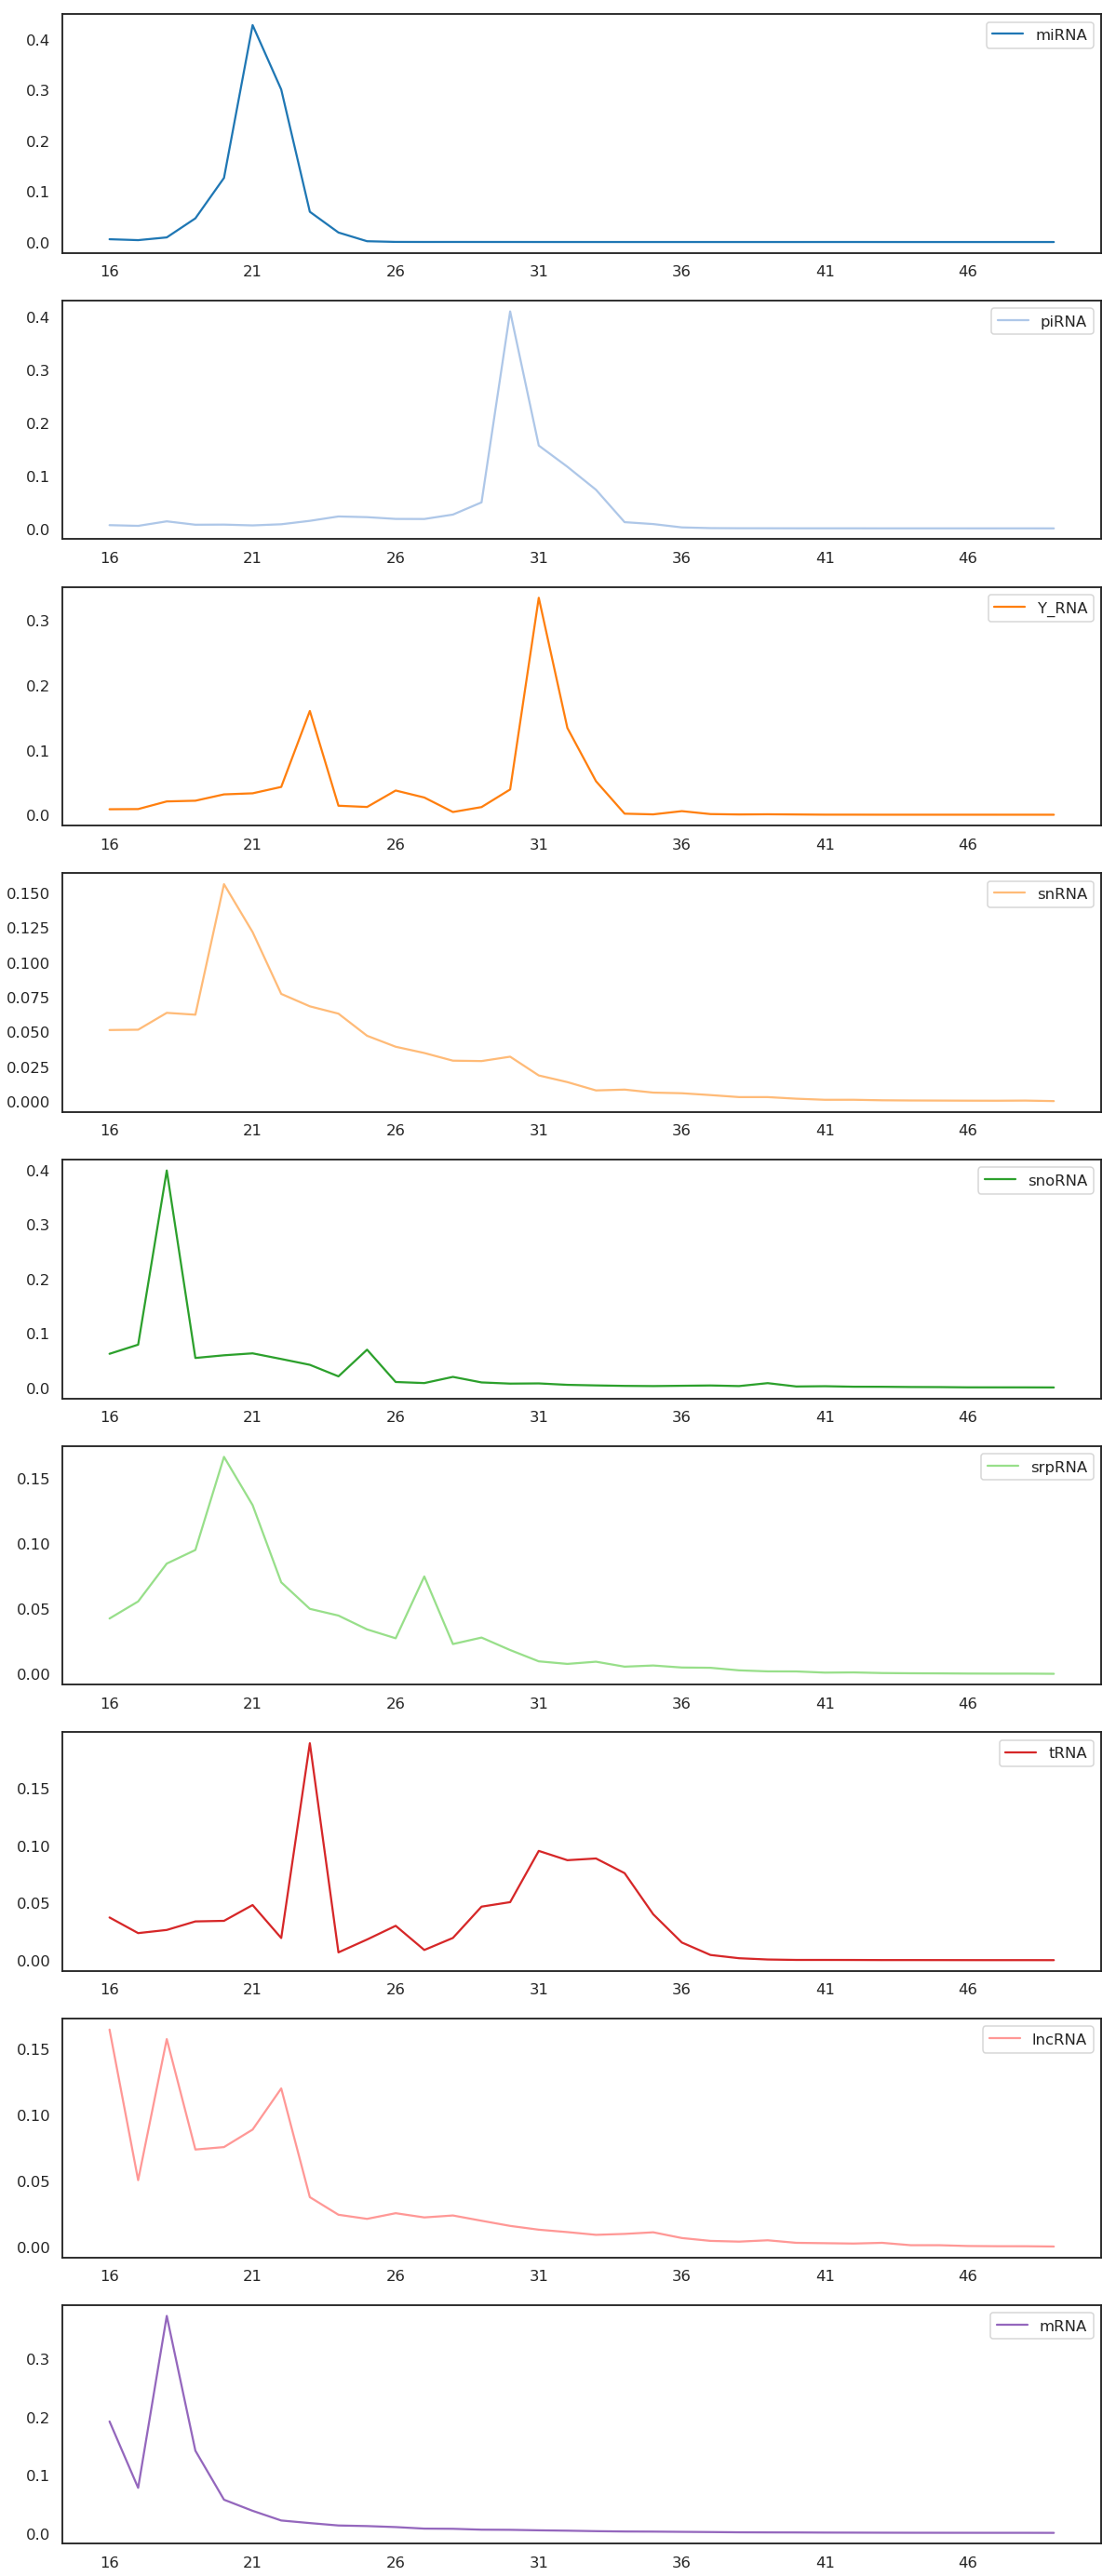

In [9]:
length = np.array(lengthdata.T)
fig,ax=plt.subplots(length.shape[0],1,figsize=(20,50))
for i in range(length.shape[0]):
    ax[i].plot(length[i],label=rnanames[i],color=colours[i])
    ax[i].legend(loc='upper right')
    ax[i].set_xticklabels(np.arange(lengthdata.index[0]-5,lengthdata.index[-1],5))

[Text(0,0,'0.0%'),
 Text(0,0,'10.0%'),
 Text(0,0,'20.0%'),
 Text(0,0,'30.0%'),
 Text(0,0,'40.0%'),
 Text(0,0,'50.0%'),
 Text(0,0,'60.0%'),
 Text(0,0,'70.0%'),
 Text(0,0,'80.0%'),
 Text(0,0,'90.0%')]

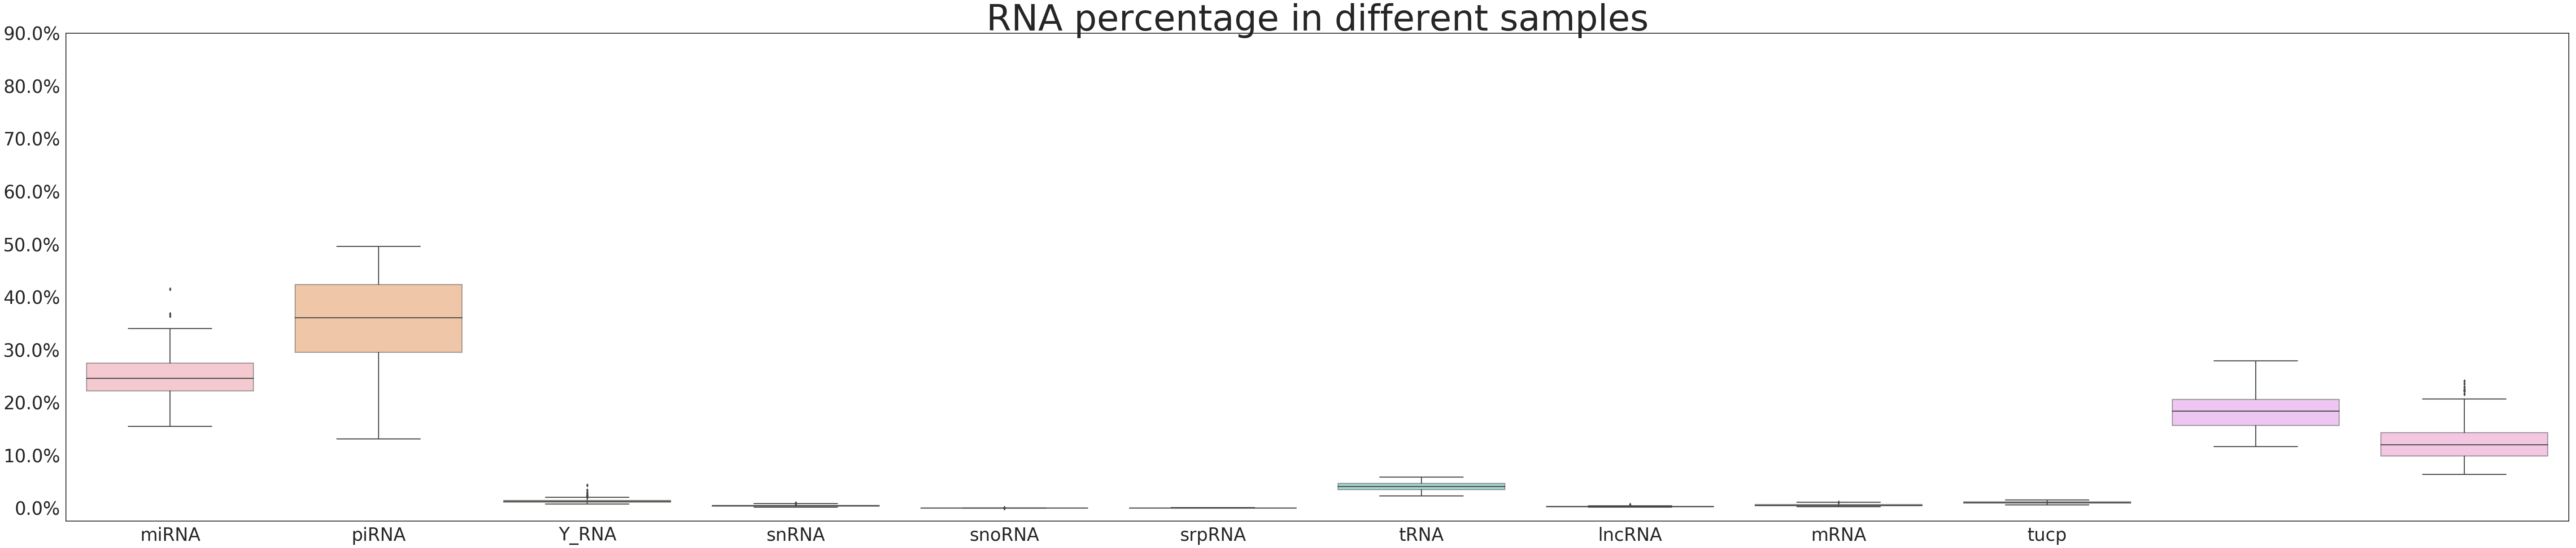

In [10]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =  rna_ratio,ax=ax,boxprops=dict(alpha=.5))
ax.set_title(u'RNA percentage in different samples',fontsize=80)
ax.set_xticks(range(10))
ax.set_xticklabels(rnanames,fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)

### 3D distribution

In [24]:
rnanames.shape, lengthdata.shape

((12,), (34, 9))

In [25]:
lengthdata.columns

Index(['miRNA', 'piRNA', 'Y_RNA', 'srpRNA', 'snRNA', 'snoRNA', 'tRNA',
       'lncRNA', 'mRNA'],
      dtype='object')

In [28]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3d(width,height,azim,elev,contextind,styind):
    '''
    count_ 长度种类  num rna数量
    '''
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig = plt.figure(figsize=(width,height))
    ax1 = fig.gca(projection="3d")
    num = lengthdata.shape[1]
    count_ = lengthdata.shape[0]

    xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(num),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*num)
    dx = np.ones(count_*num)/5
    dy = np.ones(count_*num)/5
    dz = np.array(lengthdata.T).ravel()

    for i in range(num):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(tableau20)/float(256))[:num][i],alpha=0.9)
    plt.xticks(range(count_), [str(i+16) for i in range(count_)], color='red')
    #for i in range(9):
    ax1.set_yticks(range(num))
    ax1.set_yticklabels(lengthdata.columns, color='blue')
    for color,tick in zip((np.array(tableau20)/float(256))[:num],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  # 50 20
    #ax1.set_title('width,height,azim,elev: ' + str(width)+"   "+str(height)+"   "+str(azim)+"   "+str(elev),fontsize=30)
    #ax1.bar3d(xpos[3:], ypos[3:], zpos[3:], dx[3:], dy[3:], dz[3:], color='b')
    #print ('azim: '+str(azim))
    fig.tight_layout()
    plt.show()
    #fig.savefig('images/length/lengthdistribution_'+str(t))

In [29]:
interact(plot_3d,
         rnaname =Dropdown(options=['11kind']),
    styind=FloatSlider(min=0,max=2,step=1),
         count_=IntSlider(min=30,max=40,step=1,value=34),
    num=IntSlider(min=7,max=15,step=1,value=11),
    contextind=FloatSlider(min=0,max=3,step=1,value=2),
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=16),
    azim= FloatSlider(min=0,max=180,step=2,value=45),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

interactive(children=(FloatSlider(value=25.0, description='width', max=40.0, min=4.0, step=1.0), FloatSlider(value=16.0, description='height', max=30.0, min=4.0, step=1.0), FloatSlider(value=45.0, description='azim', max=180.0, step=2.0), FloatSlider(value=32.0, description='elev', max=180.0, step=1.0), FloatSlider(value=2.0, description='contextind', max=3.0, step=1.0), FloatSlider(value=0.0, description='styind', max=2.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d>

### stack bar

In [ ]:
# 补充！real counts!

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(30,6))
wholetable_sum.T.plot(kind='bar', 
                                stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20[10:]))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of exoRBase RNAs',fontsize=40)

Text(0.5,1,'Stacked Bar plot')

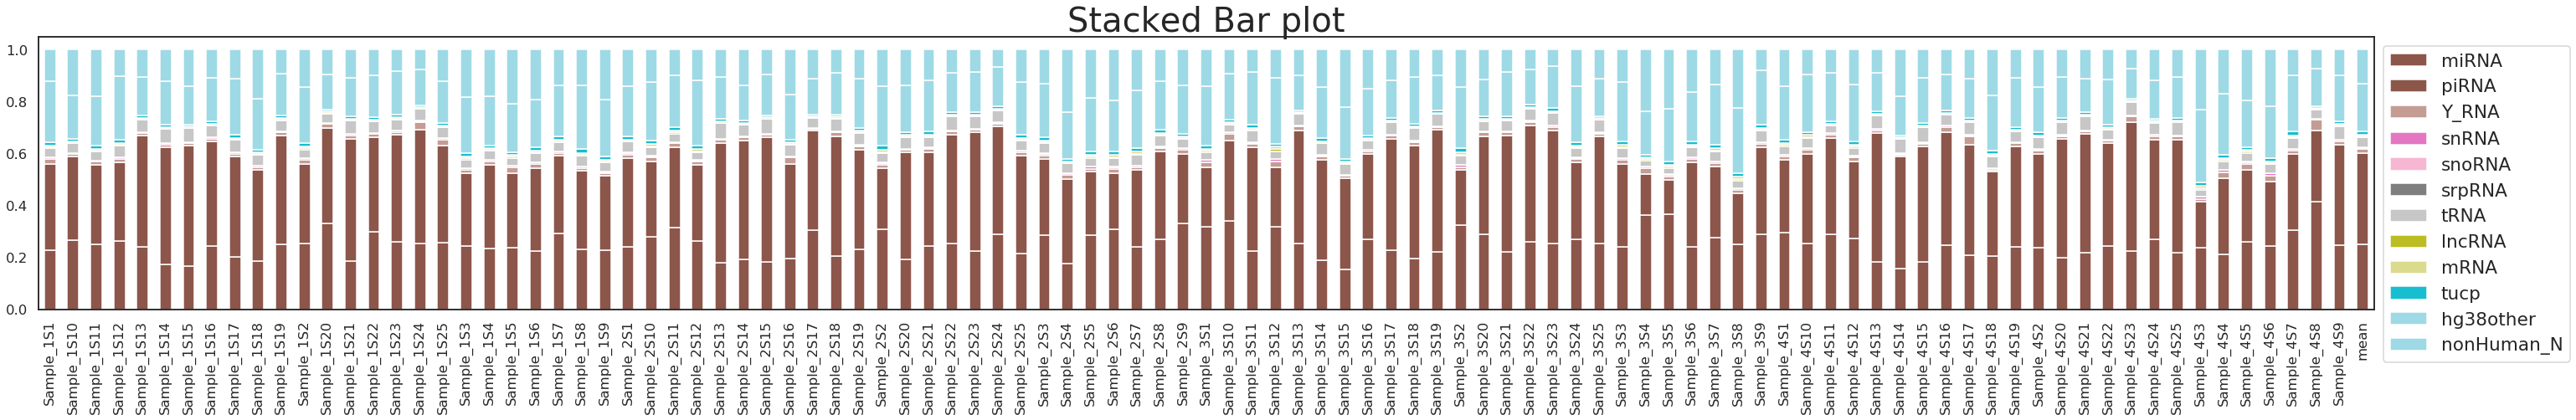

In [71]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(50,6))
rna_ratio.plot(kind='bar', stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20[10:]))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot',fontsize=40)

### bar plot

In [32]:
display(rna_ratio.head())

,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA,tucp,hg38other,nonHuman_N
Sample_1S1,0.230273,0.331604,0.016360,0.007073,0.000298,0.000806,0.035032,0.003882,0.007302,0.012638,0.233108,0.121623
Sample_1S10,0.267002,0.320761,0.010116,0.003316,0.000203,0.000536,0.037869,0.003044,0.005817,0.009621,0.166514,0.175200
Sample_1S11,0.250690,0.306307,0.011824,0.004003,0.000225,0.000612,0.034920,0.003556,0.006975,0.011333,0.189603,0.179952
Sample_1S12,0.265619,0.300422,0.013549,0.005439,0.000352,0.000842,0.044244,0.003327,0.008459,0.012719,0.244968,0.100062
Sample_1S13,0.241204,0.428304,0.009041,0.004130,0.000262,0.000501,0.047176,0.002561,0.004107,0.009265,0.148161,0.105289


In [65]:
def plot_bar(table,rnaname):
    count = np.array(table[table.index ==rnaname]).ravel()
    fig,ax=plt.subplots(1,figsize=(20,6))
    counttable =  pd.DataFrame(np.concatenate((np.arange(1,table.shape[1]+1).reshape(-1,1),
                count[np.argsort(-count)].reshape(-1,1)),axis=1),columns=['sample','counts'])
    sns.barplot(x='sample',y='counts',data = counttable,color='b',alpha=0.5)

    ax.set_xticks(np.arange(0,table.shape[1],5))
    ax.set_xticklabels(np.arange(0,table.shape[1],5))
    ax.set_title('Ratio of '+rnaname,fontsize=30)

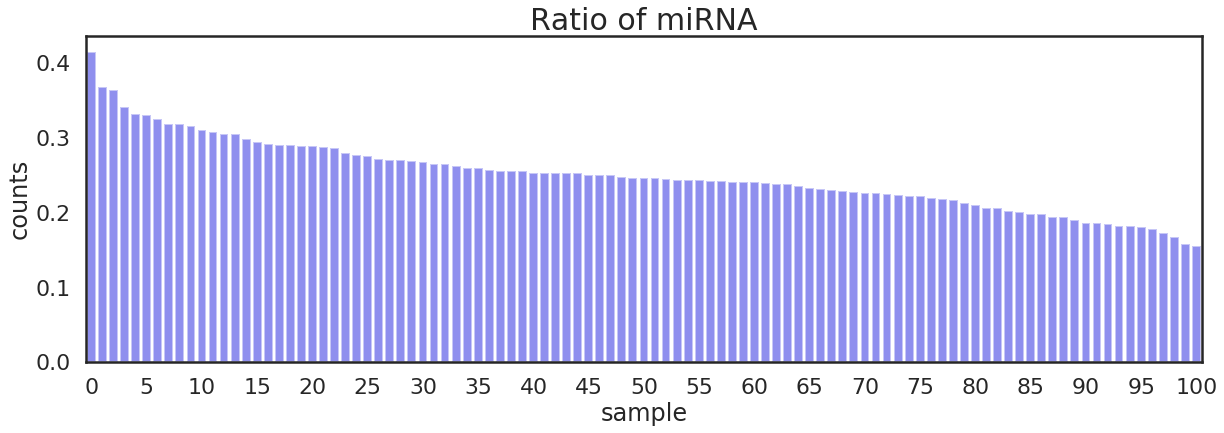

In [66]:
plot_bar(rna_ratio.T,'miRNA')

# QC

| **Check point** | **Threshold** | **Notes** |
| :--- | :--- | :--- |
| Raw reads quality | reads quality &gt;28 \(median lines in green area\) | Check fastqc results\(\*.html\) |
| Clean reads number | **&gt; 10 million** | Adaptors and too-short sequences removed reads |
| rRNAs% | **&lt; 10%** | Reads mapped to rRNAs \(all following % are divided by the **total number of clean reads**\) |
| HG% | &gt; 60% \(optional\) | Reads mapped to Human Genome **except rRNAs** |
| Transcriptome% | **&gt; 50%** | Reads mapped to Human **Transcriptome** \(including rRNA, miRNA, piRNA, Y RNA, srpRNA, snRNA, snoRNA, tRNA, mRNA exons, lncRNA exons, TUCP exons\) |
| Y RNA% | **10%~65%** | Reads mapped to Y RNA |
| miRNA% | **10%~65% \(**up to 80% for exoRNAs**\)** | Reads mapped to miRNA |